In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 逻辑回归 

## 逻辑回归模型介绍

### 逻辑分布

- 累计分布函数和密度函数：
$$
F(x) = P(X<=x)=\frac{1}{1+e^{-(x-\mu)/\gamma}} \\
f(x) = F'(x)=\frac{e^{-(x-\mu)/\gamma}}{\gamma(1+e^{-(x-\mu)/\gamma})^2}
$$
- 其中$\mu$为位置参数，$\gamma > 0$为形状参数

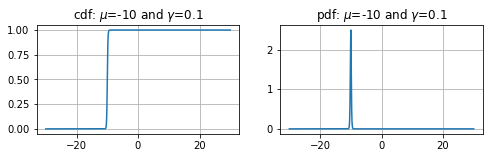

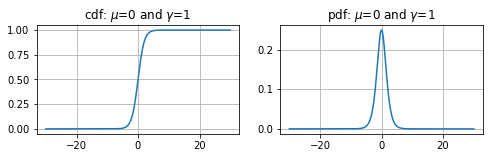

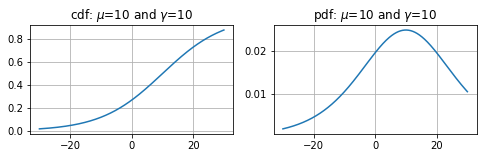

In [2]:
mus=[-10, 0, 10]
gammas = [0.1, 1, 10]
for mu, gamma in zip(mus, gammas):
    plt.figure(figsize=(8, 2))
    
    plt.subplot(121)
    x = np.arange(-30, 30, 0.01)
    y = 1/(1+np.exp(-(x-mu)/gamma))
    plt.plot(x, y)
    plt.title(f'cdf: $\mu$={mu} and $\gamma$={gamma}')
    plt.grid(True)
    
    plt.subplot(122)
    y = np.exp(-(x-mu)/gamma)/(gamma * (1+np.exp(-(x-mu)/gamma))**2)
    plt.plot(x, y)
    plt.title(f'pdf: $\mu$={mu} and $\gamma$={gamma}')
    plt.grid(True)
    
    plt.show()

### Binomial logistic regression model
- 模型定义：
    $$
        P(Y=1|x)=\frac{exp(w\cdot x)}{1+exp({w\cdot x})}
    $$
- 模型解释：
    - 定义odds=$\frac{p}{1-p}$即一个事件发生的概率/一个事件不发生的概率，则对于逻辑回归模型，有下式成立：
    $$
        log{\frac{ P(Y=1|x) }{ 1-P(Y=1|x) }}=w\cdot x
    $$
    - 为什么不直接用线性的回归式：[Check Answers from Quora](https://www.quora.com/Why-should-we-use-log-of-odds-in-logistics-regression-and-not-the-same-in-linear-regression)
        1. 不可解释，因为线性回归时无法对y作出约束
        2. 概率通常不是线性的
        3. 二分数据不服从正态分布，而正态分布是线性回归的条件

- 参数估计：
    - 假设x是由如下方式生成的：$P(Y=1|x)=\pi (x)$, thus $P(Y=0|x)=1-\pi (x)$
    - 实例出现的联合概率相乘可得似然函数：$\prod_{i=1}^{N}[\pi(x_i)]^{y_i}[1 - \pi(x_i)]^{1-y_i}$
    - 因此对数似然函数为:
    $$
        \begin{align}
            L(w)&=\sum^N_{i=1}[y_ilog\pi(x_i) + (1-y_i)log(1-\pi (x_i))] \\
               &=\sum^N_{i=1}[y_ilog\frac{\pi (x_i)}{1-\pi(x_i)}] \\
               &=\sum^N_{i=1}[y_i(w\cdot x_i) - log(1+exp(w\cdot x_i)]
        \end{align}
    $$

- 最大化上式即可求得最优解

### Motinomial logistic regression model

$$
    \begin{align}
        &P(Y=k|x)=\frac{exp(w_k\cdot x)}{1+\sum^{K-1}_{k=1}exp(w_k\cdot x)}, \ \ \ k=1,2,...,K-1 \\
        &P(Y=K|x)=\frac{1}{1+\sum^{K-1}_{k=1}exp(w_k\cdot x)}
    \end{align}
$$

## 二分类逻辑回归模型实现

### Load data set "iris"

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [4]:
X = iris['data'][:, 3:]  # X的特征是petal width
y = (iris["target"] == 2).astype(np.int)  # y = 1 if Iris-Virginica, else 0

### Fit the model

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Visualization of model's estimation of probabilities

In [6]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

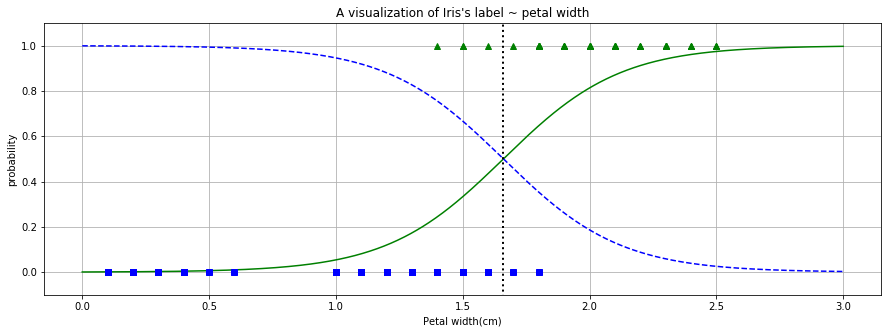

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(X_new, y_proba[:, 1], "g-", label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], "b--", label='Not Iris-Virginica')
plt.ylabel('probability')
plt.xlabel('Petal width(cm)')
plt.title('A visualization of Iris\'s label ~ petal width')

# plot decision boundary
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)

# plot instances
plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')

plt.ylim(-0.1, 1.1)
plt.grid()
plt.show()

In [8]:
decision_boundary

array([1.66066066])

In [9]:
log_reg.coef_, log_reg.intercept_

(array([[4.3330846]]), array([-7.1947083]))

## 多分类逻辑回归模型实现

### load dataset

In [10]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"])

### fit a model

In [11]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### draw the decision boundary plot

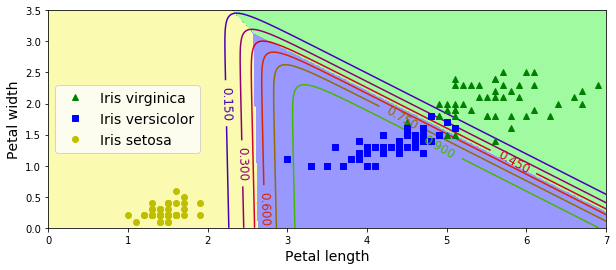

In [12]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1), # 转化为n行1列
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
# x0: 200, 500
# x1: 200, 500
X_new = np.c_[x0.ravel(), x1.ravel()]
# X_new: 200*500

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
# 对平面上的整个区域计算预测值

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# 原始的实例点
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

# 画出色块
plt.contourf(x0, x1, zz, cmap=custom_cmap)
# 画出分割线
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

# 最大熵模型

## 最大熵模型介绍

### 最大熵原理

- 即在满足约束条件的模型中选择熵最大的模型
- 熵的定义:
    - 假设离散随机变量$X$的概率分布为$P(X)$，那么它的熵为：$H(P)=-\sum_xP(x)logP(x)$
- 熵的性质：
    - $0 \le H(P) \le log|X|$，其中右侧项是X的取值个数，当且仅当X是均匀分布时右侧的等号成立。换而言之，在没有更多信息的前提下，那些不确定的部分是等可能的。
- 一个简单的例子：假设随机变量X有5个取值{A, B, C, D, E}，要估计取各个值的概率：
    - 约束条件一：概率和相加为一。没有理由不认为各个值的取值概率相等，即均为五分之一
        $$
            P(A)+P(B)+P(C)+P(D)+P(E)=\frac{1}{5
            }
        $$
    - 约束条件二：$P(A)+P(B)=\frac{3}{10}$，此时可以认为A与B是等概率的，C，D与E是等概率的，于是：
        $$
        \begin{align}
            &P(A)=P(B)=\frac{3}{20}  \\
           &P(C)=P(D)=P(E)=\frac{7}{30}
          \end{align}
        $$
    - 新增的约束条件将会进一步更改概率分布。。。

### 最大熵分类模型：
- 模型的定义：一个条件概率分布$P(Y|X)$，给定输入X的情况下，一条件概率输出y
- 根据数据，需要对模型施加约束，比方说看到什么样的x，就会产生什么样的y，如果用如下的一个函数代表一个约束，即：
    $$
        f(x,y)= 
        \begin{cases}
        1, \ x和y满足某一事实 \\
        0, \ otherwise
        \end{cases}
    $$
- 那么根据数据就会产生如下的约束，即在数据中，上面这个f对应的事实的满足情况：
    $$
        E_{\tilde{P}}=\sum_{x,y}\tilde{P}(x,y)f(x,y)
    $$
其中：
    $$
    \tilde{P}(x, y)=\tilde{P}(X=x, Y=y)=\frac{\nu (X=x, Y=y)}{N}
    $$
- 同样的，对于模型来说，事实f的满足情况可以用如下的方法表示：
    $$
    E_{\tilde P}(f)=\sum_{x,y} \tilde{P(x)} P(y|x)f(x,y)
    $$
- 如果模型能够刻画数据中的模式，那么两个期望值应该是相等的：
    $$
    E_P(f) = E_{\tilde P}(f) \\
    $$
或者:
    $$
    \sum_{x,y}\tilde P(x)P(y|x)f(x,y)=\sum_{x,y} \tilde{P}(x,y)f(x,y)
    $$
- 假设一个集合$\mathcal{C}$中的模型都满足所有约束，那么最大熵模型为该集合中下式（条件熵）最大的模型：
    $$
    H(P)=-\sum_{x,y}\tilde P(x)P(y|x)\ln P(Y|x)
    $$
    
## 最大熵模型的学习：
- 最大熵模型的学习等价于约束最优化问题:
    $$
        min_{P\in C} -H(P)=\sum_{x,y}P(x)P(y|x)\log P(y|x) \\ 
        s.t. \ E_{\tilde P}(f_i)=E_P(f_i), \ i=1,\dots,n \\
        \sum_yP(y|x)=1
    $$
- 采用拉格朗日乘数法解决上述的问题：
    $$
       L(P,w)=-H(P)+w_{0}(1-\sum_{y}P(y|\mathbf{x}))+\sum_{i=1}^{n}w_i(E_{\tilde{P}}(f_{i})-E_{P}(f_{i})) \\ 
       原始问题为: \min_{P\in C}{\max_{w}{L(P,w)}} \\
       对偶问题为：\max_{w}{\min_{P\in C}{L(P,w)}} 
    $$
- 为求解内层的最小化问题:
    <img src="./images/07_max_entropy_derivation1.png" style="zoom: 30%;" />
- 接下来求解外层的最大化问题，该问题可以通过最优化算法解决:
    $$
        \max_w \psi(\omega)
    $$

## 一个例子
- 假设随机变量X有5个取值{A, B, C, D, E}，要估计取各个值的概率，并且已知信息是A,B事件的概率之和为3/10。那么对应的最优化问题以及其解法可以参照下图：
    - 最优化问题:
        <img src="./images/07_max_entropy_example1.png" style="zoom: 50%;" />
    - 求解：
        <img src="./images/07_max_entropy_example2.png" style="zoom: 50%;" />
        <img src="./images/07_max_entropy_example3.png" style="zoom: 50%;" />
        <img src="./images/07_max_entropy_example4.png" style="zoom: 50%;" />

## 最大熵模型的学习（续：与极大似然的关系）

- 首先需要看Reference的第一条，才能够理解似然函数的另一种表达方式。
- 其次再根据reference6和统计学习方法，对最大熵模型和最大似然有如下结论：

### 极大似然法
- 极大似然估计的一般形式表示为：
    $$
        L_{\tilde p} = \prod_x p(x)^{\tilde p(x)} \\ 
        \begin{align}
            取对数，并写成样本联合概率的形式：\\
            L_{\tilde p}(p) &=\sum_{x,y}\tilde p(x,y) \log p(x,y) \\
                       &=\sum_{x,y}\tilde p(x,y) \log \tilde [p(x)p(y|x)] \\
                       &=\sum_{x,y}\tilde p(x,y) \log p(x|y) + \sum_{x,y}\tilde p(x,y)\log \tilde p(x) \\
        \end{align}\\
    $$
- 可以发现，后面一项为常数，所以最后结果为：
    $$
        L_{\tilde p}(p)=\sum_{x,y}\tilde p(x,y) \log p(x|y)
    $$
- 注意直到上一步，还没有和最大熵模型有任何关联。如果这个条件概率由最大熵模型生成，可以将如下的最大熵模型代入极大似然中，以估计模型系数：
    - 最大熵模型(注意这个模型在使用拉格朗日之前就已经建立，极大似然和拉格朗日属于两个等地位的模型解法)：<img src="./images/07_max_entropy_mle1.png" style="zoom: 50%;" />
    - 带入似然函数：<img src="./images/07_max_entropy_mle2.png" style="zoom: 50%;" />
    - 所以最终下一节算法需要解决的就是上面这个似然函数的最大化问题。
        
### 拉格朗日法
- 接下来看拉格朗日的外层最大化问题，我们已知要最大化的拉格朗日函数为：
    <img src="./images/07_max_entropy_mle3.png" style="zoom: 50%;" />
- 将其中的P换为里层最小化问题的解$P_w$，即可得到外层需要最大化的函数$\Psi$，注意由于约束条件的存在，似然函数中的w0项恒为0：
    <img src="./images/07_max_entropy_mle4.png" style="zoom: 50%;" />
- 最终可以发现，这和上面极大似然法推出的最大化目标式完全一致。

# Reference:
1. 最大熵模型中的对数似然函数的解释：https://blog.csdn.net/wkebj/article/details/77965714
2. [从逻辑回归到最大熵模型](https://mp.weixin.qq.com/s?__biz=MzIwNzc2NTk0NQ==&mid=2247484596&idx=1&sn=56527faa95791acca061e3b62345899c&chksm=970c2c62a07ba574ba71771aeda7f163d3ac10aae6e166e36a752c4237e79ac155d0d7166e3e&scene=21#wechat_redirect)
3. [浅入深出被人看扁的逻辑回归！](https://mp.weixin.qq.com/s?__biz=MzIwNzc2NTk0NQ==&mid=2247484011&idx=1&sn=42e4f331db843091c5c3809a4d259fad&chksm=970c2abda07ba3abb3963c2defcc644582f28bbdc23f3d669d022cd032e637d2ca8b6b48ca62&scene=21#wechat_redirect)
4. [深入深出Sigmoid与Softmax的血缘关系](https://mp.weixin.qq.com/s?__biz=MzIwNzc2NTk0NQ==&mid=2247484122&idx=1&sn=41628bf3169b9ef3fa107646d483bae5&chksm=970c2a0ca07ba31ae1939e316c15695c83556c347e0b38bb80dde3048533de7de388ec2a6544&scene=21#wechat_redirect)
5. 最大熵学习笔记：https://blog.csdn.net/itplus/article/details/26550597
6. 最大熵模型中的数学推导：https://blog.csdn.net/v_july_v/article/details/40508465